In [1]:
from IPython.display import display
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = load_digits()
print(type(train.data))
print(train.data.shape)
print(train.keys())

<class 'numpy.ndarray'>
(1797, 64)
dict_keys(['target', 'images', 'target_names', 'DESCR', 'data'])


In [3]:
data = pd.DataFrame(train.data[:1797])
label = pd.Series(train['target'])
print(data.shape)
print(label.shape)
print(label.head())
data.head()

(1797, 64)
(1797,)
0    0
1    1
2    2
3    3
4    4
dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


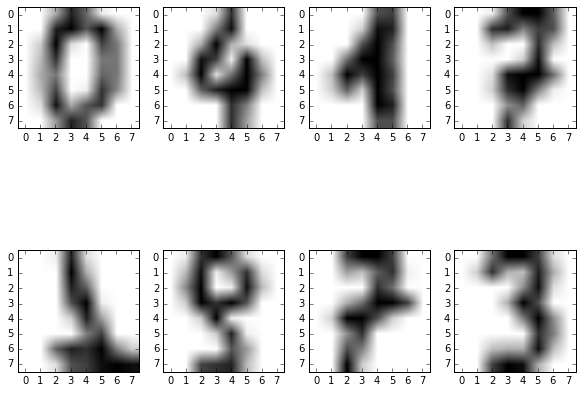

In [4]:
fig = plt.figure(figsize=(10,8))

row = [0,100,200,300,1000,1100,1200,1300]

temp = data.iloc[0].values.reshape(8,8)

for i in range(1,9):
    ax = plt.subplot(2,4,i)
    np_image = data.iloc[row[i-1]].values.reshape(8,8)
    plt.imshow(np_image, cmap='gray_r')

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

def train(train_X, train_y, k):
    '''Train using K-nearest neighbor algorithm'''
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X, train_y)
    return knn

def test(test_X, test_y, model):
    predict = model.predict(test_X)
    accuracy = sum(predict == test_y.values)/len(test_y)
    #print(accuracy)
    return accuracy

def cross_validate(data, label, k):
    kf = KFold(n_splits=4, shuffle=True, random_state=1)
    accuracy_cv = []
    for train_index, test_index in kf.split(data):
        train_X, test_X = data.iloc[train_index], data.iloc[test_index]
        train_y, test_y = label.iloc[train_index], label.iloc[test_index]
        #display(train_X.head(3))
        #display(test_X.head(3))
        model = train(train_X, train_y, k=k)
        accuracy = test(test_X, test_y, model)
        accuracy_cv.append(accuracy)
    return np.mean(accuracy_cv)


In [6]:
fold_accuracies = []
k = np.arange(1,20)
for i in k:
    fold_accuracies.append(cross_validate(data, label, i))
    
print(fold_accuracies)

[0.9827456075228903, 0.9805184360306854, 0.9855283345706509, 0.9849690670626082, 0.9832999257609502, 0.9805159613956941, 0.9821863400148477, 0.9816295471417965, 0.9788468200940361, 0.9782887899034892, 0.9771789161098738, 0.9771764414748825, 0.9755085374907201, 0.9755073001732245, 0.9749517446176689, 0.9738381588715664, 0.9705011135857461, 0.9688307349665924, 0.9693887651571393]


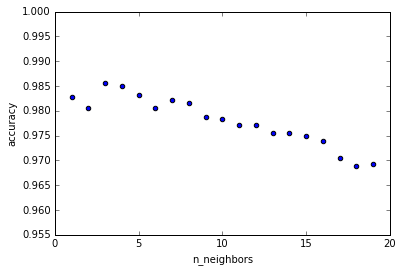

In [7]:
plt.scatter(k, fold_accuracies)
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')

In [18]:
from sklearn.neural_network import MLPClassifier

def train_nn(train_X, train_y, n_neurons):
    mlp = MLPClassifier(hidden_layer_sizes=n_neurons)
    mlp.fit(train_X, train_y)
    return mlp

def test_nn(test_X, test_y, model):
    predict = model.predict(test_X)
    accuracy = sum(predict == test_y.values)/len(test_y)
    return accuracy
    
def cross_validate_nn(n_neurons, n_splits):
    kf = KFold(n_splits, shuffle=True, random_state=1)
    accuracy_kfold = []
    for train_index, test_index in kf.split(data):
        train_X, test_X = data.iloc[train_index], data.iloc[test_index]
        train_y, test_y = label.iloc[train_index], label.iloc[test_index]
        model = train_nn(train_X, train_y, n_neurons)
        accuracy = test_nn(test_X, test_y, model)
        accuracy_kfold.append(accuracy)
    print(accuracy_kfold)
    return np.mean(accuracy_kfold)        

In [9]:
neurons = [(8,), (16,), (32,), (64,), (128,), (256,)]
accuracy = []
for n in neurons:
    accuracy_kfold = cross_validate_nn(n,n_splits=4)
    accuracy.append(accuracy_kfold)
    


/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



[0.9022222222222223, 0.9265033407572383, 0.8485523385300668, 0.9354120267260579]
[0.9577777777777777, 0.9487750556792873, 0.9599109131403119, 0.9510022271714922]
[0.9666666666666667, 0.9643652561247216, 0.9665924276169265, 0.9599109131403119]
[0.9711111111111111, 0.955456570155902, 0.9755011135857461, 0.9665924276169265]
[0.9822222222222222, 0.9599109131403119, 0.977728285077951, 0.9665924276169265]
[0.9711111111111111, 0.9621380846325167, 0.9821826280623608, 0.9732739420935412]


[0.9031724820588964, 0.9543664934422174, 0.9643838158871567, 0.9671653056174215, 0.971613462014353, 0.9721764414748825]


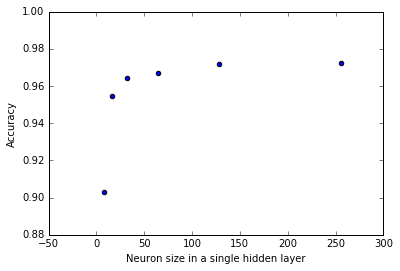

In [11]:
plt.scatter(neurons, accuracy)
plt.xlabel('Neuron size in a single hidden layer')
plt.ylabel('Accuracy')
print(accuracy)

The performance of the single layer neural network model massively improves with increasing number of neurons. We get an accuracy of 97% with 256 neurons up from 90% with 8 neurons. 

However, using the k-nearest neighbor algorith gives us an accuracy of 98.5%. There doesn't seem to be any advantage in using the neural network.

Accuracy, here, is defined as the correct number of classifications made by the model, when compared to the model.

In [17]:
#Neural Network using 2 hidden layers

accuracy_2layers = cross_validate_nn(n_neurons=(64,64), n_splits=4)
print(accuracy_2layers)

0.9732826033160109


Adding another hidden layer with 64 neurons in both layers does not improve the accuracy by much when compared to 1 layer with 256 neurons. Using more hidden layers could cause overfitting but we are using a 4-fold cross validation method that should limit the overfitting.

In [19]:
#3 hidden layers and 6-fold CV

neurons = [(10,10,10), 
           (64, 64, 64),
           (128, 128, 128)
          ]
accuracy_3layers = []
for n in neurons:
    accuracy = cross_validate_nn(n_neurons=n, n_splits=6)
    accuracy_3layers.append(accuracy)
    
print(accuracy_3layers)    

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



[0.9366666666666666, 0.9166666666666666, 0.9166666666666666, 0.9264214046822743, 0.9264214046822743, 0.9163879598662207]
[0.97, 0.9766666666666667, 0.9533333333333334, 0.9632107023411371, 0.979933110367893, 0.9698996655518395]
[0.9733333333333334, 0.9866666666666667, 0.9666666666666667, 0.9832775919732442, 0.979933110367893, 0.9698996655518395]
[0.9232051282051282, 0.9688405797101449, 0.9766295057599406]


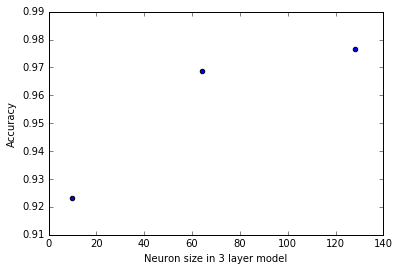

In [30]:
x = [n[0] for n in neurons]
plt.scatter(x, accuracy_3layers)
plt.xlabel('Neuron size in 3 layer model')
plt.ylabel('Accuracy')

Using 3 hidden layer neural network model with 6-fold cross validation increases our simple accuracy to 98%. Having more layers and more neurons seems to improve the network's performance.